In [30]:
import pandas as pd
import os
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
os.chdir('C:/Users/17652/python Project')
print(os.getcwd())

C:\Users\17652\python Project


In [31]:
#input files
features = pd.read_csv('Features_data_set.csv')
sales = pd.read_csv('sales_data_set.csv')
stores = pd.read_csv('stores_data_set.csv')
sales['Date']= pd.to_datetime(sales['Date'])
features['Date']= pd.to_datetime(features['Date'])

In [33]:
#merges sales and features input file
data_sales_date = sales.groupby(["Date","Store","IsHoliday"]).agg({"Weekly_Sales":"sum"})
data_sales_date.head()
output1 = pd.merge(data_sales_date, features, how='left', on = ['Date','Store'],sort=True)

count       446.000000
mean     112363.151585
std       62765.582592
min       21535.921000
25%       57667.363000
50%      102139.620500
75%      155521.317500
max      300470.233000
Name: Weekly_Sales_temp, dtype: float64

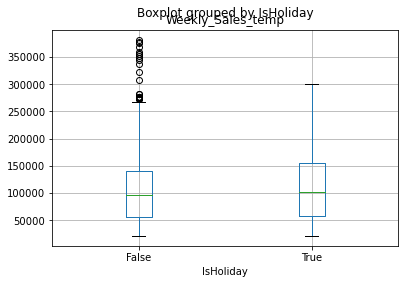

In [34]:
#Descriptive statistics of weekly sales for Regular & Holidays
output1['Weekly_Sales_temp']=output1['Weekly_Sales']/10
boxplot = output1.boxplot(column=['Weekly_Sales_temp'], by='IsHoliday')
holiday = output1[output1["IsHoliday"]== True]
non_holiday = output1[output1["IsHoliday"]== False]
holiday['Weekly_Sales_temp'].describe()


In [35]:
non_holiday['Weekly_Sales_temp'].describe()

count      5966.000000
mean     104077.059366
std       55901.905788
min       20998.625000
25%       55116.941500
50%       95557.434500
75%      141325.805250
max      381868.645000
Name: Weekly_Sales_temp, dtype: float64

In [36]:
#merges stores file to sales and features merged file
output2 = pd.merge(output1, stores, how='left', on = ['Store'],sort=True)
output2 = output2.applymap(lambda x: 1 if x ==  True  else x)
output2 = output2.applymap(lambda x: 0 if x ==  False  else x)
output2.head()
output2.to_csv("output2.csv")


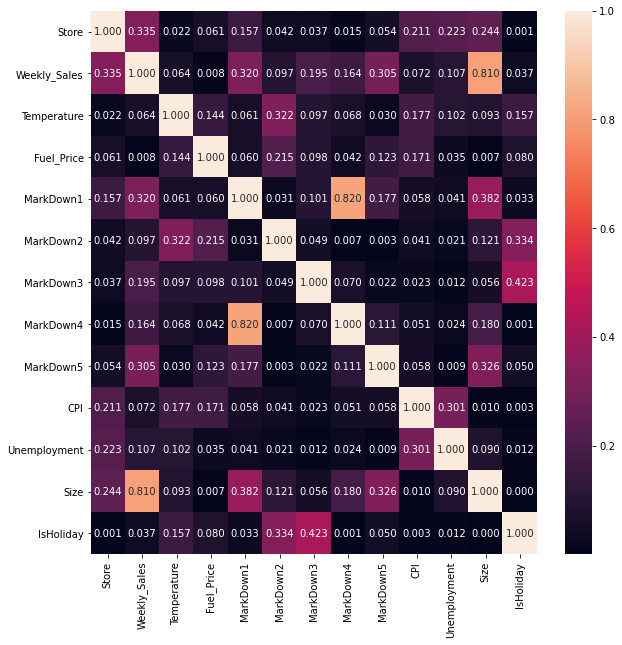

In [37]:
#correlation and heat map for different store features with weekly sales
data_in=output2[['Store', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3','MarkDown4', 'MarkDown5','CPI','Unemployment','Type','Size','IsHoliday']]
corr = data_in.corr()
corr = abs(corr)
plt.figure(figsize=(10,10))
sns.heatmap(corr, 
            annot=True, fmt=".3f",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

Text(0, 0.5, 'Sales')

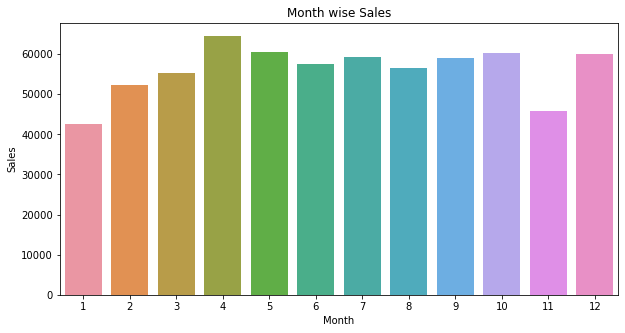

In [38]:
#Monthly sales analysis of all stores
output1['Month'] = output1['Date'].dt.month 
data_sales_month = output1.groupby(output1.Month).agg({"Weekly_Sales":"sum"})
data_sales_month.Weekly_Sales = data_sales_month.Weekly_Sales/10000
data_sales_month.Weekly_Sales = data_sales_month.Weekly_Sales.apply(int)
plt.figure(figsize=(10, 5))
sns.barplot(x=data_sales_month.index,y=data_sales_month.Weekly_Sales)
plt.title("Month wise Sales")
plt.xlabel("Month")
plt.ylabel("Sales")

In [39]:
data_Store = features.groupby("Store").agg({"Temperature":"mean","Fuel_Price":"mean","IsHoliday":"sum"})
temp_store = sales.groupby("Store").agg({"Weekly_Sales":"sum"})
temp_store.Weekly_Sales = temp_store.Weekly_Sales/1000000
temp_store.Weekly_Sales = temp_store.Weekly_Sales.apply(int)
data_Store.set_index(np.arange(0,45),inplace=True)
stores["temp"] = data_Store.Temperature
stores["Fuel_Price"] = data_Store.Fuel_Price
stores["holiday"] = data_Store.IsHoliday
stores["Weekly_Sales"] = temp_store.Weekly_Sales
stores.describe()

,Store,Size,temp,Fuel_Price,holiday,Weekly_Sales
count,45.000000,45.000000,45.000000,45.000000,45.000000,44.000000
mean,23.000000,130287.600000,59.361436,3.404583,12.866667,150.090909
std,13.133926,63825.271991,9.966524,0.154021,0.343776,78.780478
min,1.000000,34875.000000,37.850663,3.246358,12.000000,37.000000
25%,12.000000,70713.000000,51.961050,3.259242,13.000000,78.500000
50%,23.000000,126512.000000,57.996575,3.328764,13.000000,140.500000
75%,34.000000,202307.000000,68.616519,3.497874,13.000000,200.750000
max,45.000000,219622.000000,75.438077,3.644558,13.000000,301.000000


C:\Users\17652\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

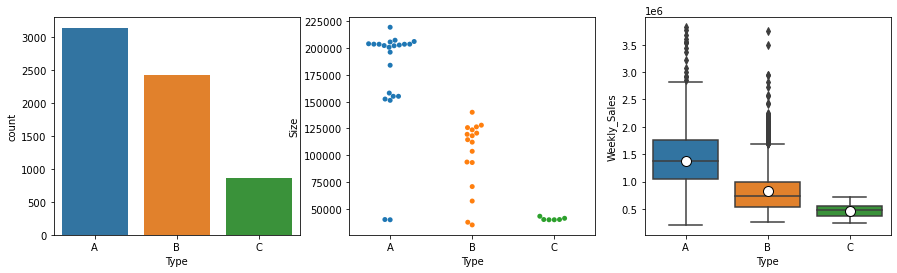

In [40]:
#Store Type wise analysis
fig,ax = plt.subplots(1,3,figsize=(15, 4))
sns.countplot(output2.Type,ax=ax[0])
sns.swarmplot(data = stores,y="Size",x="Type",ax=ax[1])
sns.boxplot(data = output2,y="Weekly_Sales",x="Type",ax=ax[2],
            showmeans=True,meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"black","markersize":"10"})

Text(0.5, 0, 'Department')

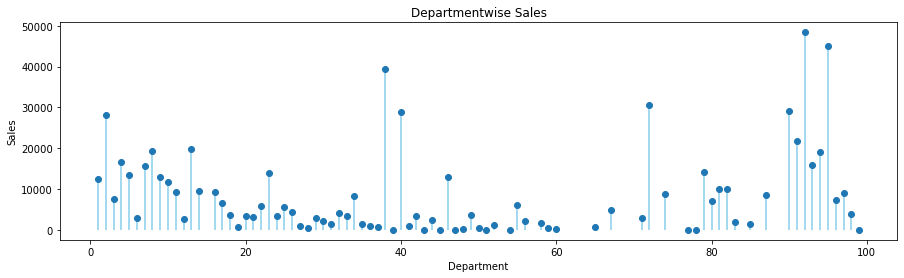

In [41]:
#Department wise Analysis
data_Dept = sales.groupby("Dept").agg({"Weekly_Sales":"sum"})
data_Dept.sort_values(by="Weekly_Sales")
data_Dept.Weekly_Sales = data_Dept.Weekly_Sales/10000
data_Dept.Weekly_Sales = data_Dept.Weekly_Sales.apply(int)

fig1, ax1 = plt.subplots(figsize=(15, 4))
#ordered_df = data_Dept.sort_values(by='Weekly_Sales')
plt.vlines(x=data_Dept.index, ymin=0, ymax=data_Dept['Weekly_Sales'], color='skyblue')
plt.plot(data_Dept.index,data_Dept['Weekly_Sales'], "o")
plt.title("Departmentwise Sales")
plt.ylabel("Sales")
plt.xlabel("Department")

In [13]:
data_Dept.to_csv("Dept_sales.csv")

In [42]:
#Store Type wise analysis over 3 years
sales_date_store = sales.groupby(["Date","Store"]).agg({"Weekly_Sales":"sum"})
sales_date_store.sort_index(inplace=True)
sales_date_store.Weekly_Sales = sales_date_store.Weekly_Sales/10000
sales_date_store.Weekly_Sales = sales_date_store.Weekly_Sales.apply(int)
data_table = pd.merge(features,sales_date_store ,  how='left', on=["Date","Store"])
data_table = pd.merge(data_table,stores[["Store","Type"]] ,  how='left', on=["Store"])
data_table.head(20)
data_train = data_table[data_table.Weekly_Sales.notnull()]
data_test = data_table[data_table.Weekly_Sales.isnull()]
data_train.to_csv("data_train.csv")

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

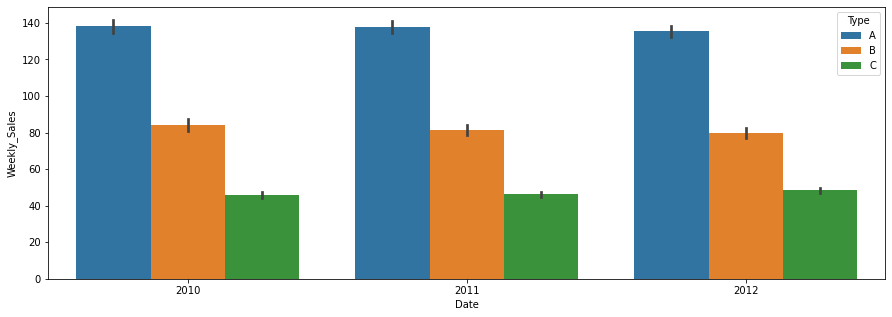

In [43]:
plt.figure(figsize=(15, 5))
sns.barplot(x=data_train.Date.dt.year, y=data_train.Weekly_Sales,hue=data_train.Type)

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

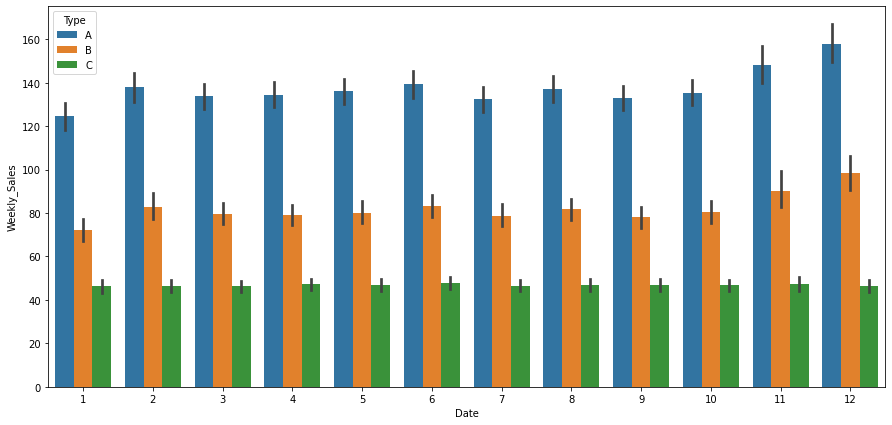

In [44]:
#Store Type wise analysis over months
plt.figure(figsize=(15, 7))
sns.barplot(x=data_train.Date.dt.month, y=data_train.Weekly_Sales,hue=data_train.Type)

In [45]:
train_markdown = output2[output2.MarkDown2.notnull()]
train_markdown = train_markdown.groupby("Date").agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})


Text(0, 0.5, 'Markdown')

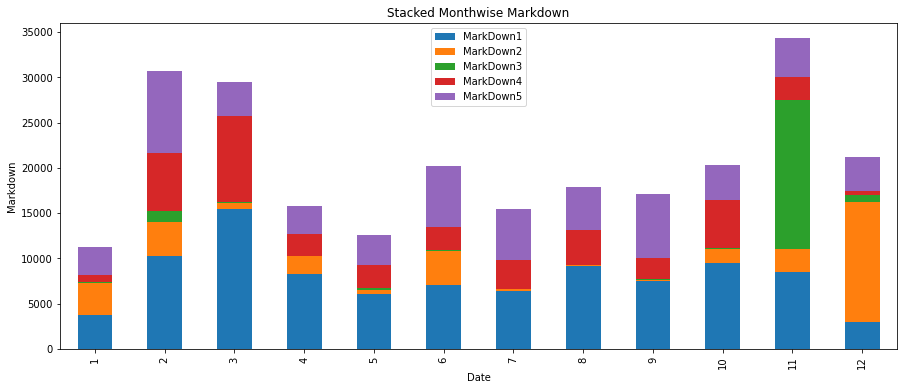

In [46]:
#Markdown analysis
train_markdown_month = train_markdown.groupby(train_markdown.index.month).agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})
train_markdown_month.plot(kind='bar', stacked=True,figsize=(15,6))
plt.title("Stacked Monthwise Markdown")
plt.ylabel("Markdown")

In [47]:
output1['Month'] = output1['Date'].dt.month 
output1['Year'] = output1['Date'].dt.year 
#output1.head(5)
reg_data = output1.groupby([output1.Store,output1.Month,output1.Year],as_index=False).agg({"Weekly_Sales":"sum","MarkDown1":"sum","MarkDown2":"sum","MarkDown3":"sum","MarkDown4":"sum","MarkDown5":"sum"})

In [48]:
#regression and sales prediction
df_stores = pd.read_excel('Stores_Pred.xlsx')
stores_pred = tuple(df_stores)
length=len(stores_pred)
for i in range(1,46):
    df_curr = reg_data.loc[reg_data['Store'] == i]
    x = df_curr[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","Month","Year"]]
    y = df_curr["Weekly_Sales"]
    model = LinearRegression().fit(x, y)
    r_sq = model.score(x, y)
    print('coefficient of determination:', r_sq)
    print('intercept:', model.intercept_)
    print('slope:', model.coef_)
    for mon in range(1,13):
        y_pred = model.predict(np.array([[1000, 1000, 1000, 1000, 1000, mon, 2013]]))
        print('predicted sales:', y_pred, sep='\n')


coefficient of determination: 0.23543812477949233
intercept: 2728143227.5616508
slope: [ 4.96887655e+01  2.01598146e+01  2.44575758e+01 -2.52232625e+01
  6.11957738e+01  2.14744825e+04 -1.35409573e+06]
predicted sales:
[2500271.54259014]
predicted sales:
[2521746.02505255]
predicted sales:
[2543220.50751495]
predicted sales:
[2564694.98997736]
predicted sales:
[2586169.47243977]
predicted sales:
[2607643.95490217]
predicted sales:
[2629118.43736458]
predicted sales:
[2650592.91982651]
predicted sales:
[2672067.40228891]
predicted sales:
[2693541.88475132]
predicted sales:
[2715016.36721373]
predicted sales:
[2736490.84967613]
coefficient of determination: 0.26253824251061286
intercept: 3675746768.125161
slope: [ 2.88174592e+00  1.75921409e+01  2.64085006e+01  4.16759986e+01
  6.40090042e+01  6.09848808e+04 -1.82475538e+06]
predicted sales:
[2727740.81459284]
predicted sales:
[2788725.69542599]
predicted sales:
[2849710.57625914]
predicted sales:
[2910695.45709229]
predicted sales:
[297

coefficient of determination: 0.22154583854427667
intercept: 1786023384.2836044
slope: [ 4.10445606e+01  2.55962309e+01  1.46316898e+01 -6.99551169e+01
  5.55181732e+01  3.97290025e+04 -8.86556005e+05]
predicted sales:
[1492709.84676862]
predicted sales:
[1532438.84928298]
predicted sales:
[1572167.85179734]
predicted sales:
[1611896.8543117]
predicted sales:
[1651625.85682607]
predicted sales:
[1691354.85934043]
predicted sales:
[1731083.86185479]
predicted sales:
[1770812.86436939]
predicted sales:
[1810541.86688375]
predicted sales:
[1850270.86939812]
predicted sales:
[1889999.87191248]
predicted sales:
[1929728.87442684]
coefficient of determination: 0.24760816335489855
intercept: 3933424677.662934
slope: [ 2.88552029e+01  3.42767811e+01 -1.59419437e+01 -1.23791485e+01
  5.63119702e+01  7.67821481e+04 -1.95320501e+06]
predicted sales:
[1790890.32933235]
predicted sales:
[1867672.4773984]
predicted sales:
[1944454.62546492]
predicted sales:
[2021236.77353096]
predicted sales:
[20980

In [25]:
st=int(input("Enter store number "))
df_curr = reg_data.loc[reg_data['Store'] == st]
x = df_curr[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","Month","Year"]]
y = df_curr["Weekly_Sales"]
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
m1=int(input('Enter markdown value '))
m2=int(input('Enter markdown value '))
m3=int(input('Enter markdown value '))
m4=int(input('Enter markdown value '))
m5=int(input('Enter markdown value '))
mon=int(input('Enter month '))
yr=int(input('Enter year '))
y_pred = model.predict(np.array([[m1, m2, m3, m4, m5, mon, yr]]))
print('predicted sales:', y_pred, sep='\n')

Enter store number 1
coefficient of determination: 0.23543812477949233
intercept: 2728143227.5616508
slope: [ 4.96887655e+01  2.01598146e+01  2.44575758e+01 -2.52232625e+01
  6.11957738e+01  2.14744825e+04 -1.35409573e+06]
Enter markdown value 1000
Enter markdown value 1000
Enter markdown value 1000
Enter markdown value 1000
Enter markdown value 1000
Enter month 1
Enter year 2013
predicted sales:
[2500271.54259014]


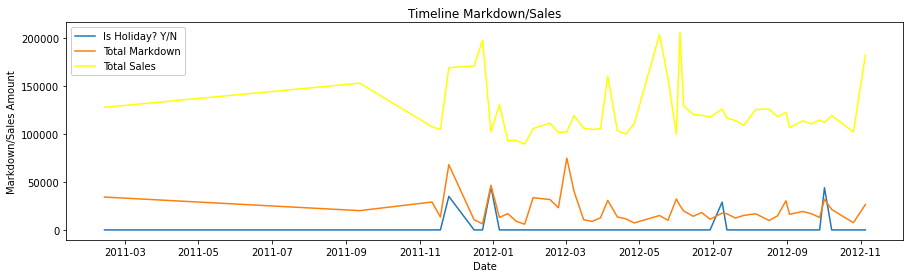

In [49]:
#Markdown analysis
plt.figure(figsize=(15,4))
train_markdown = output2[output2.MarkDown2.notnull()]
train_markdown = train_markdown.applymap(lambda x: 1 if x ==  True  else x)
train_markdown = train_markdown.applymap(lambda x: 0 if x ==  False  else x)
train_markdown = train_markdown.groupby("Date").agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean","Weekly_Sales":"mean","IsHoliday":"sum"})
train_markdown["IsHoliday"] = train_markdown.IsHoliday*1000
train_markdown["Weekly_Sales"] = train_markdown.Weekly_Sales/10
train_markdown['Total_Markdown'] = train_markdown[['MarkDown1', 'MarkDown2','MarkDown3','MarkDown4','MarkDown5']].sum(axis=1)
train_markdown.to_csv("train_markdown.csv")
plt.plot(train_markdown.index,train_markdown.IsHoliday, label ='Is Holiday? Y/N')
plt.plot(train_markdown.index,train_markdown.Total_Markdown, label ='Total Markdown')
plt.plot(train_markdown.index,train_markdown.Weekly_Sales, color = 'yellow', label ='Total Sales')
plt.title("Timeline Markdown/Sales")
plt.ylabel("Markdown/Sales Amount")
plt.xlabel("Date")
plt.legend(framealpha=1, frameon=True);